In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
df= pd.read_csv("cult_fitness_realistic_100k.csv")

In [3]:
df.head()

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,...,goal,endurance_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,fitness_level,bmi,category
0,8270,05-07-2023,36,Male,158,66,Strength,69.0,High,370,...,Weight Loss,Low,6.8,Medium,4,Non-smoker,NaN,Advanced,26.44,Overweight
1,1860,13-10-2023,28,Female,166,69,Dance,20.0,High,595,...,Muscle Gain,Medium,7.1,Medium,12,Non-smoker,NaN,Beginner,25.04,Overweight
2,6390,16-11-2023,31,Female,184,74,Dance,999.0,High,297,...,Weight Loss,High,5.6,Low,8,Non-smoker,NaN,Intermediate,21.86,Normal
3,6191,02-05-2023,45,Male,176,66,Running,79.0,High,396,...,Weight Loss,Medium,7.9,Medium,4,Non-smoker,NaN,Intermediate,21.31,Normal
4,6734,28-06-2023,wrong,Male,165,x,HIIT,49.0,Medium,405,...,Weight Loss,Low,sleep,Medium,4,Non-smoker,NaN,Intermediate,none,Normal


In [4]:
df["health_condition"].isnull().sum()

70605

In [5]:
df["health_condition"].value_counts(dropna=False)

health_condition
NaN             70605
Asthma          12356
Hypertension    10044
Diabetes         7995
Name: count, dtype: int64

In [6]:
df.shape

(101000, 25)

In [7]:
df.columns.tolist()

['participant_id',
 'date',
 'age',
 'gender',
 'height_cm',
 'weight_kg',
 'activity_type',
 'duration_minutes',
 'intensity',
 'calories_burned',
 'daily_steps',
 'avg_heart_rate',
 'resting_heart_rate',
 'calorie_intake',
 'maintenance_calorie',
 'goal',
 'endurance_level',
 'sleep_hours',
 'stress_level',
 'hydration_level',
 'smoking_status',
 'health_condition',
 'fitness_level',
 'bmi',
 'category']

# Data Exploration

In [8]:
df["age"].unique()

array(['36', '28', '31', '45', 'wrong', '50', '13', '34', nan, '30', '38',
       '26', '46', '24', '16', '23', '41', '39', '35', '14', '21', '33',
       '27', '29', '37', '25', '18', '15', '44', '43', '48', '12', '20',
       '22', '42', '32', '19', '47', '40', '52', '17', 'xx', '49', '51',
       '10', '8', '54', '11', '53', '57', '56', '5', '7', '55', '58',
       '59', '9', '6', '-1', '3', '4', '0', '63', '2', '62', '61', '-3',
       '70', '65', '1'], dtype=object)

- there are wrong data types , wrong values and some outliers.

In [9]:
df["age"].nunique()

69

In [10]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
df["gender"].nunique()

3

In [12]:
df["gender"].value_counts()

gender
Male      60776
Female    35223
Other      5001
Name: count, dtype: int64

In [13]:
df["height_cm"].unique()

array(['158', '166', '184', '176', '165', '167', '159', '171', nan, '178',
       '173', '153', '182', '160', '190', '156', '??', '164', '174',
       '181', '168', '170', '172', '175', '157', '187', '162', '169',
       '152', '177', '185', '186', '179', '155', '161', '163', '193',
       '149', '189', '148', '180', '195', '154', '183', '144', '150',
       '146', '151', '147', '194', '139', '143', '145', '191', '201',
       '188', '137', '141', '192', '198', '131', '196', '197', '142',
       '140', '133', '135', '199', '138', '136', '202', '130', '132',
       '200', '134', '205', '206', '203', '128', '204', '125', '127'],
      dtype=object)

- height column contain missing values , wrong data type and wrong data 

In [14]:
df["height_cm"].nunique()

81

In [15]:
df["weight_kg"].unique()

array(['66', '69', '74', 'x', '75', '73', '85', 'bad', '82', '90', '80',
       '64', '71', '101', '68', '86', '76', '56', '58', '54', '79', '78',
       '47', '53', '94', '81', '61', '65', '77', '72', '49', '55', '51',
       '84', nan, '87', '63', '92', '67', '50', '60', '62', '70', '83',
       '59', '48', '57', '89', '52', '96', '103', '100', '39', '88', '42',
       '93', '41', '102', '95', '91', '107', '97', '46', '45', '36', '40',
       '43', '44', '33', '99', '35', '105', '31', '38', '113', '104',
       '98', '34', '106', '109', '37', '29', '108', '111', '18', '21',
       '32', '26', '110', '30', '114', '28', '20', '25', '121', '116',
       '118', '112', '24', '27', '115', '12', '22'], dtype=object)

- there are wrong data types , wrong values and some outliers present in our weight_kg column

In [16]:
df["weight_kg"].nunique()

102

In [17]:
df["activity_type"].unique()

array(['Strength', 'Dance', 'Running', 'HIIT', 'Cycling', 'Yoga'],
      dtype=object)

In [18]:
df["activity_type"].nunique()

6

In [19]:
df["activity_type"].value_counts()

activity_type
Strength    25308
Running     20195
HIIT        20093
Yoga        14979
Cycling     10214
Dance       10211
Name: count, dtype: int64

In [20]:
df["duration_minutes"].unique()

array([ 69.,  20., 999.,  79.,  49.,  38.,  63.,  66.,  35.,  45.,  21.,
        40.,  42.,  34.,  41., -10.,  19.,  43.,  46.,  37.,  25.,  62.,
        59.,  74.,  64.,  26.,  10.,  31.,  39.,   2.,   4.,  58.,  32.,
        28.,  17.,  76.,  nan,  68.,  85.,  22.,  15.,  73.,  33.,  29.,
         3.,  56.,  12.,  24.,  80.,  71.,  75.,  60.,  36.,  65.,  18.,
        78.,  -7.,  55.,  50.,  57.,  48.,  86.,  72.,  70.,  53.,  44.,
        30.,  47.,  61.,  14.,  77.,  67.,  27.,   5.,   6.,  52.,  54.,
        23.,  89.,  92.,  16.,  -6.,  -2.,  51.,  83.,  82.,   9.,  -4.,
        90.,  95.,  91.,  11.,  81., -24.,  13.,  97.,  99.,   1., -14.,
        93., -31.,  88.,   7., -40., 106.,  -3.,  84.,  87.,   0., 103.,
         8.,  94.,  -8., 105.,  -1., 107., -19., -22.,  -5.,  98.,  -9.,
       -18., 101., -12., -13., 104., -11., -20., -16., -26., -15., 100.,
       112., 102., 110., -21.,  96., 114., 108., 109., -17., 111., 113.,
       116., -27., -35., -51., -23., 115., -28., -3

- duration_minutes column contain outliers

In [21]:
df["duration_minutes"].nunique()

158

In [22]:
df["duration_minutes"].dtype

dtype('float64')

In [23]:
df["intensity"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [24]:
df["intensity"].nunique()

3

In [25]:
df["intensity"].value_counts()

intensity
Medium    50509
High      30406
Low       20085
Name: count, dtype: int64

In [26]:
df["calories_burned"].unique()

array(['370', '595', '297', '396', '405', '155', '428', '238', '205',
       '231', '424', '346', '240', '420', '587', '447', '427', 'abc',
       '335', '304', '518', '337', '236', '277', '650', '359', '154',
       '445', '269', '435', '377', '631', '224', '384', '296', '251',
       '365', '292', '450', '515', '307', '218', '318', '327', nan, '374',
       '350', '128', '382', '390', '485', '400', '66', '298', '280',
       '409', '227', '537', '507', '340', '257', '261', '153', '455',
       '397', '253', '398', '407', '133', '272', '309', '228', '376',
       '465', '168', '182', '404', '163', '264', '549', '473', '540',
       '144', '434', '278', '149', '181', '334', '535', '311', '206',
       '463', '612', '192', '402', '247', '401', '331', '187', '172',
       '171', '367', '416', '119', '259', '317', '139', '389', '348',
       '489', '330', '325', '357', '271', '299', '265', '305', '290',
       '422', '129', '198', '508', '429', '410', '300', '395', '315',
       '482', '4

- calorie_burned column contain outlier , missing values and wrong data

In [27]:
df["calories_burned"].nunique()

851

In [28]:
df["daily_steps"].unique()

array(['4406', '5449', '10689', ..., '-1342', '899', '-1503'],
      dtype=object)

- daly steps column contian outliers and wrong data type

In [29]:
df["daily_steps"].nunique()

14549

In [30]:
df["avg_heart_rate"].unique()

array(['85', '84', '71', '82', '111', '114', '98', '107', '102', '108',
       '97', 'oops', '101', '70', '90', '100', '92', '77', '78', '113',
       '96', '76', '123', nan, '86', '105', '110', '95', '65', '80',
       '115', '81', '88', '104', '93', '109', '89', '68', '106', '99',
       '75', '103', '121', '73', '83', '125', '79', '64', '57', '94',
       '141', '119', '60', '67', '117', '120', '122', '112', '87', '116',
       '124', '137', '91', '63', '69', '72', '128', '62', '58', '118',
       '74', '61', '131', '55', '134', '56', '66', '54', '138', '127',
       '129', '135', '133', '59', '140', '52', '139', '132', '144', '148',
       '126', '130', '53', '136', '48', '43', '49', '50', '154', '51',
       '47', '146', '142', '150', '44', '152', '145', '45', '38', '46',
       '143', '41', '33', '26', '149', '32', '164', '151', '40', '155',
       '37', '147', '157', '34', '42', '153'], dtype=object)

- avg_heart_rate column contain missing value , wrong data and wrong data type

In [31]:
df["avg_heart_rate"].nunique()

125

In [32]:
df["resting_heart_rate"].unique()

array(['65', '54', '72', '71', 'bad', '58', '64', '61', '55', '63', '59',
       '67', nan, '57', '49', '68', '69', '62', '66', '51', '76', '77',
       '73', '75', '70', '52', '86', '60', '46', '56', '48', '78', '74',
       '81', '50', '45', '53', '80', '79', '82', '91', '87', '83', '43',
       '85', '84', '37', '47', '41', '44', '34', '42', '40', '39', '35',
       '33', '88', '89', '92', '90', '38', '36', '93', '94', '96', '95',
       '32', '98', '30', '101', '31'], dtype=object)

- resting_heart_rate column contain  wrong data and wrong data type

In [33]:
df["resting_heart_rate"].nunique()

70

In [34]:
df["calorie_intake"].unique()

array(['2299', nan, 'wrong', ..., '3554', '3329', '877'], dtype=object)

- calorie_intake column contain wrong data and wrong data type

In [35]:
df["calorie_intake"].nunique()

2553

In [36]:
df["maintenance_calorie"].unique()

array(['1933', '2202', '2113', ..., '2551', '1292', '2690'], dtype=object)

- maintenance_calorie column contain wrong data type

In [37]:
df["maintenance_calorie"].nunique()

1341

In [38]:
df["goal"].unique()

array(['Weight Loss', 'Muscle Gain', 'Maintenance'], dtype=object)

In [39]:
df["goal"].nunique()

3

In [40]:
df["goal"].value_counts()

goal
Weight Loss    40252
Muscle Gain    30491
Maintenance    30257
Name: count, dtype: int64

In [41]:
df["endurance_level"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [42]:
df["endurance_level"].nunique()

3

In [43]:
df["endurance_level"].value_counts()

endurance_level
Medium    50382
Low       30288
High      20330
Name: count, dtype: int64

In [44]:
df["sleep_hours"].unique()

array(['6.8', '7.1', '5.6', '7.9', 'sleep', '5.7', '6.4', nan, '6.3',
       '8.7', '6.1', '4.9', '7', '5.3', '5.4', '7.7', '4.3', '6.5', '5.9',
       '5', '5.1', '8.1', '9.2', '7.4', '7.5', '8.2', '9', '6.7', '4.6',
       '7.8', '6.2', '3.1', '4.7', '8.9', '6', '7.3', '7.2', '4.5', '6.6',
       '5.2', '7.6', '4.8', '4.2', '4', '8.6', '8.8', '5.8', '9.4', '4.1',
       '6.9', '8.4', '8', '8.3', '5.5', '3.8', '3.6', '4.4', '9.1', '8.5',
       '9.6', '9.5', '10.3', '2.5', '3.7', '3.9', '9.8', '9.3', '3.4',
       '2.7', '3.5', '9.7', '3.3', '3.2', '3', '2.8', '10.1', '2.9',
       '10.5', '10.4', '2.4', '2.6', '2.3', '10', '9.9', '2.1', '10.2',
       '10.6', '11.8', '10.7', '2', '10.9', '1.8', '11', '10.8', '11.4',
       '2.2', '1.5', '11.2', '1.9', '11.3', '1.6', '11.1', '11.5', '1.7'],
      dtype=object)

- sleep_hour column contain missing value , wrong data and wrong data type

In [45]:
df["sleep_hours"].nunique()

103

In [46]:
df["stress_level"].unique()

array(['Medium', 'Low', 'High', 'Extreme'], dtype=object)

In [47]:
df["stress_level"].nunique()

4

In [48]:
df["stress_level"].value_counts()

stress_level
Medium     45800
Low        30218
High       19875
Extreme     5107
Name: count, dtype: int64

In [49]:
df["hydration_level"].unique()

array(['4', '12', '8', '6', nan, '7', '5', '3', 'H2O', '9', '2', '0', '1',
       '10', '11', '-1', '13', '-2', '14'], dtype=object)

- hydration_level column contain missing values , outliers , wrong data and wrong data type

In [50]:
df["hydration_level"].nunique()

18

In [51]:
df["smoking_status"].unique()

array(['Non-smoker', 'Occasional', 'Smoker'], dtype=object)

In [52]:
df["smoking_status"].nunique()

3

In [53]:
df["smoking_status"].value_counts()

smoking_status
Non-smoker    80705
Occasional    10170
Smoker        10125
Name: count, dtype: int64

In [54]:
df["health_condition"].unique()

array([nan, 'Asthma', 'Hypertension', 'Diabetes'], dtype=object)

In [55]:
df["health_condition"].nunique()

3

In [56]:
df["health_condition"].value_counts()

health_condition
Asthma          12356
Hypertension    10044
Diabetes         7995
Name: count, dtype: int64

In [57]:
df["fitness_level"].unique()

array(['Advanced', 'Beginner', 'Intermediate'], dtype=object)

In [58]:
df["fitness_level"].nunique()

3

In [59]:
df["fitness_level"].value_counts()

fitness_level
Beginner        50433
Intermediate    35482
Advanced        15085
Name: count, dtype: int64

In [60]:
df["bmi"].unique()

array(['26.44', '25.04', '21.86', ..., '44.23', '9.25', '11.89'],
      dtype=object)

- bmi contain wrong data type

In [61]:
df["bmi"].nunique()

2396

In [62]:
df["category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Underweight'], dtype=object)

In [63]:
df["category"].nunique()

4

In [64]:
df["category"].value_counts()

category
Normal         42870
Overweight     30673
Obese          17421
Underweight    10036
Name: count, dtype: int64

In [65]:
df.dtypes

participant_id           int64
date                    object
age                     object
gender                  object
height_cm               object
weight_kg               object
activity_type           object
duration_minutes       float64
intensity               object
calories_burned         object
daily_steps             object
avg_heart_rate          object
resting_heart_rate      object
calorie_intake          object
maintenance_calorie     object
goal                    object
endurance_level         object
sleep_hours             object
stress_level            object
hydration_level         object
smoking_status          object
health_condition        object
fitness_level           object
bmi                     object
category                object
dtype: object

- there are some columns which contain wrong data type

In [66]:
df.columns.tolist()

['participant_id',
 'date',
 'age',
 'gender',
 'height_cm',
 'weight_kg',
 'activity_type',
 'duration_minutes',
 'intensity',
 'calories_burned',
 'daily_steps',
 'avg_heart_rate',
 'resting_heart_rate',
 'calorie_intake',
 'maintenance_calorie',
 'goal',
 'endurance_level',
 'sleep_hours',
 'stress_level',
 'hydration_level',
 'smoking_status',
 'health_condition',
 'fitness_level',
 'bmi',
 'category']

In [67]:
df.isnull().sum()/len(df)*100

participant_id          0.000000
date                    0.000000
age                     4.744554
gender                  0.000000
height_cm               7.269307
weight_kg               4.738614
activity_type           0.000000
duration_minutes        4.742574
intensity               0.000000
calories_burned         4.731683
daily_steps             4.751485
avg_heart_rate          4.776238
resting_heart_rate      4.759406
calorie_intake          4.738614
maintenance_calorie     4.773267
goal                    0.000000
endurance_level         0.000000
sleep_hours             4.738614
stress_level            0.000000
hydration_level         4.751485
smoking_status          0.000000
health_condition       69.905941
fitness_level           0.000000
bmi                     4.736634
category                0.000000
dtype: float64

- there are some columns which contain null values
- and health condition column contain 69% of missing value we have confirmed that they are not null values in place of null values there should be NONE

In [68]:
df.duplicated().sum()

1000

- there are 1000 duplicate values present  in our data 

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   participant_id       101000 non-null  int64  
 1   date                 101000 non-null  object 
 2   age                  96208 non-null   object 
 3   gender               101000 non-null  object 
 4   height_cm            93658 non-null   object 
 5   weight_kg            96214 non-null   object 
 6   activity_type        101000 non-null  object 
 7   duration_minutes     96210 non-null   float64
 8   intensity            101000 non-null  object 
 9   calories_burned      96221 non-null   object 
 10  daily_steps          96201 non-null   object 
 11  avg_heart_rate       96176 non-null   object 
 12  resting_heart_rate   96193 non-null   object 
 13  calorie_intake       96214 non-null   object 
 14  maintenance_calorie  96179 non-null   object 
 15  goal             

In [70]:
continous=["height_cm" , "weight_kg" , "duration_minutes" , "calories_burned" , "daily_steps" , "avg_heart_rate" , "resting_heart_rate" , 
            "calorie_intake" , "maintenance_calorie" , "sleep_hours"  , "bmi"]

count=["age" , "hydration_level",]

categorical=["gender" , "activity_type" , "intensity" , "goal" , "endurance_level" ,"stress_level" , "smoking_status" ,  "health_condition" ,
             "fitness_level" , "category"]

# Data Cleaning

### DUPLICATES

In [71]:
df.duplicated().sum()

1000

In [72]:
# droping the duplicates

df = df.drop_duplicates()

In [73]:
df.duplicated().sum()

0

### Treating wrong data

In [74]:
df["age"] = df["age"].str.replace(r'[A-Za-z-]',"", regex = True)

In [75]:
df["gender"] =df["gender"].replace({"Other":np.nan})

In [76]:
df["weight_kg"] =df["weight_kg"].replace(["x" ,"bad"], np.nan)

In [77]:
df["height_cm"] = df["height_cm"].replace({"??":np.nan})

In [78]:
df["avg_heart_rate"] = df["avg_heart_rate"].replace({"oops":np.nan})

In [79]:
df["resting_heart_rate"] =df["resting_heart_rate"].replace({"bad":np.nan})

In [80]:
df["calorie_intake"] = df["calorie_intake"].replace(["wrong","cc"],np.nan)

In [81]:
df["calories_burned"] = df["calories_burned"].str.replace(r'[A-Za-z-]',"", regex=True)

In [82]:
df["sleep_hours"] = df["sleep_hours"].replace({"sleep":np.nan})

In [83]:
df["hydration_level"] = df["hydration_level"].str.replace(r'[A-Za-z-]',"", regex =True)

In [84]:
df["maintenance_calorie"] = df["maintenance_calorie"].replace({"--":np.nan})

In [85]:
df["daily_steps"] = df["daily_steps"].str.replace(r'[A-Za-z-]',"", regex=True)

# we have remove all alphabetical values from daily steps column

In [86]:
df["bmi"] = df["bmi"].str.replace(r'[A-Za-z]',"", regex=True)

In [87]:
df["duration_minutes"] = df["duration_minutes"].astype(str)

df["duration_minutes"] = df["duration_minutes"].str.replace(r'[A-Za-z-]',"", regex=True)
# df["duration_minutes"] = (df["duration_minutes"].astype(str).str.replace(r'[^0-9.]', "", regex=True) 

df["duration_minutes"] = pd.to_numeric(df["duration_minutes"],errors="coerce")


# changing data 

In [88]:
df.dtypes

participant_id           int64
date                    object
age                     object
gender                  object
height_cm               object
weight_kg               object
activity_type           object
duration_minutes       float64
intensity               object
calories_burned         object
daily_steps             object
avg_heart_rate          object
resting_heart_rate      object
calorie_intake          object
maintenance_calorie     object
goal                    object
endurance_level         object
sleep_hours             object
stress_level            object
hydration_level         object
smoking_status          object
health_condition        object
fitness_level           object
bmi                     object
category                object
dtype: object

#### changing data type to float because data contain missing values and futher we will change to there respective data type 

In [89]:
df["date"] = pd.to_datetime(df["date"] , errors ="coerce",format="%d-%m-%Y")

In [90]:
df["age"] = pd.to_numeric(df["age"] , errors ="coerce")

In [91]:
df["height_cm"] = df["height_cm"].astype(float)

In [92]:
df["weight_kg"] = df["weight_kg"].astype(float)

In [93]:
df["calories_burned"] =pd.to_numeric(df["calories_burned"], errors = "coerce")

In [94]:
df["daily_steps"] = pd.to_numeric(df["daily_steps"],errors="coerce")

In [95]:
df["avg_heart_rate"] = df["avg_heart_rate"].astype(float)

In [96]:
df["resting_heart_rate"] = df["resting_heart_rate"].astype(float)

In [97]:
df["calorie_intake"] = pd.to_numeric(df["calorie_intake"], errors = "coerce")

In [98]:
df["maintenance_calorie"] = df["maintenance_calorie"].astype(float)

In [99]:
df["sleep_hours"] = df["sleep_hours"].astype(float)

In [100]:
df["hydration_level"] = df["hydration_level"].astype(float)

In [101]:
df["bmi"] = pd.to_numeric(df["bmi"],errors="coerce")

## Treating the Outliers ##

#### treating the outliers of age column

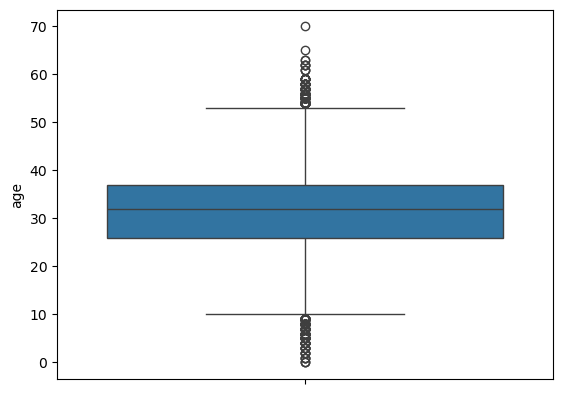

In [102]:
sns.boxplot(df["age"])
plt.show()

- age column has values which are less then 14  so that is wrong cult fitness have age limit of 14 years 

In [103]:
q1 = df["age"].quantile(0.25)
q1

26.0

In [104]:
q3 = df["age"].quantile(0.75)
q3

37.0

In [105]:
IQR = q3-q1
IQR

11.0

In [106]:
ll = q1 - 1.5 * IQR

ul = q3 + 1.5 * IQR

print(ll)
print(ul)

9.5
53.5


In [107]:
# The age limit in cult fitness is 14 so we have remove which are below 14 years

df.drop(df[df["age"]<14].index,inplace=True)

- The maximum age is 70 so that is posssible so we are treating them as real values 

#### treating the ouliers of height_cm column

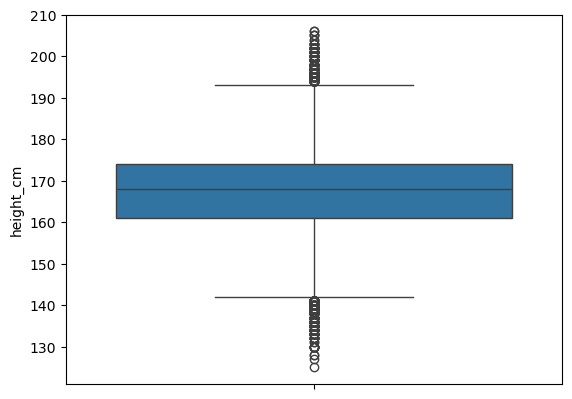

In [108]:
sns.boxplot(df["height_cm"])
plt.show()

- We are maintaing the values which are in heigt column because that are possible  we have childrens and adults also in our data set 

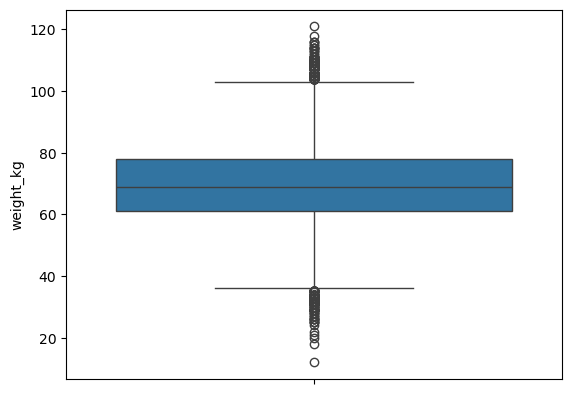

In [109]:
sns.boxplot(df["weight_kg"])
plt.show()

In [110]:
quartile_1=df["weight_kg"].quantile(0.25)
print(quartile_1)

61.0


In [111]:
quartile_3=q1=df["weight_kg"].quantile(0.75)
quartile_3

78.0

In [112]:
IQR = quartile_3-quartile_1
IQR

17.0

In [113]:
lower_limit = quartile_1 - 1.5 * IQR

upper_limit = quartile_3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

35.5
103.5


In [114]:
# replace value which are less then lower limit with lower limt 

df.loc[df["weight_kg"]<lower_limit , "weight_kg"] = lower_limit

# no need to change upper limit because that can be possible

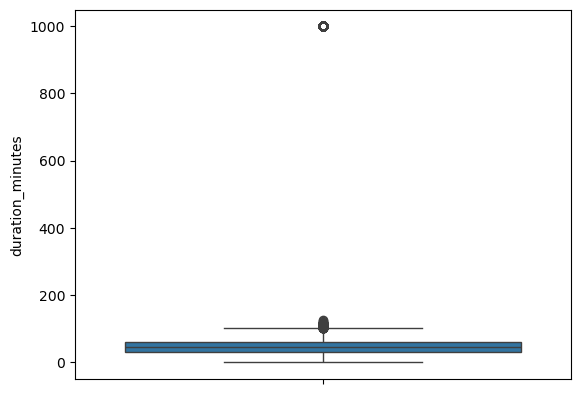

In [115]:
sns.boxplot(df["duration_minutes"])
plt.show()

In [116]:
q1=df["duration_minutes"].quantile(0.25)
q1

30.0

In [117]:
q3=df["duration_minutes"].quantile(0.75)
q3

59.0

In [118]:
IQR = q3-q1
IQR

29.0

In [119]:
ll = q1 - 1.5 * IQR

ul = q3 + 1.5 * IQR

print(ll)
print(ul)

-13.5
102.5


- The cult fitness has a rule that you must have to do any activity  minimum 30 minutes and maximum 4hrs so values which are less or more from this range will be removed 

In [120]:
#The Duration Minutes Which Are Less the 30 Minutes are replaced with 30 according to cult fitness rules 

df.loc[df["duration_minutes"]<30 , "duration_minutes"] = 30

In [121]:
# we have repalce the values which are above 240 with 240

df.loc[df["duration_minutes"]>240, "duration_minutes"] = 240

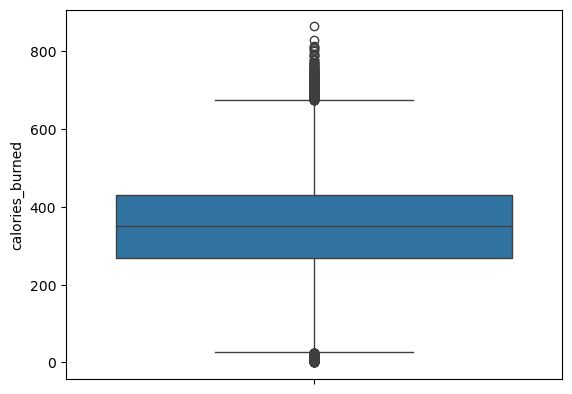

In [122]:
sns.boxplot(df["calories_burned"])
plt.show()

In [123]:
q1 = df["calories_burned"].quantile(0.25)
q1

269.0

In [124]:
q3  = df["calories_burned"].quantile(0.75)
q3

431.0

In [125]:
IQR = q3-q1
IQR

162.0

In [126]:
ll = q1 - 1.5 * IQR

ul = q3 + 1.5 * IQR

print(ll)
print(ul)

26.0
674.0


In [127]:
#replacing values which are less then 60 with 60 according to research

df.loc[df["calories_burned"]<60 , "calories_burned"] = 60

# no need to change upper limit  values 

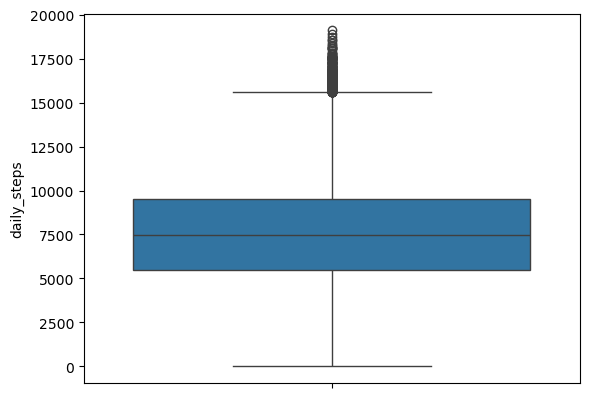

In [128]:
sns.boxplot(df["daily_steps"])
plt.show()

In [129]:
q1 =  df["daily_steps"].quantile(0.25)
q1

5467.0

In [130]:
q3 = df["daily_steps"].quantile(0.75)
q3

9512.0

In [131]:
IQR = q3-q1
IQR

4045.0

In [132]:
ll = q1 - 1.5 * IQR

ul = q3 + 1.5 * IQR

print(ll)

print(ul)

-600.5
15579.5


In [133]:
#replacing values which are less then 200 with 200 according to research

df.loc[df["daily_steps"]<200 , "daily_steps"] =200

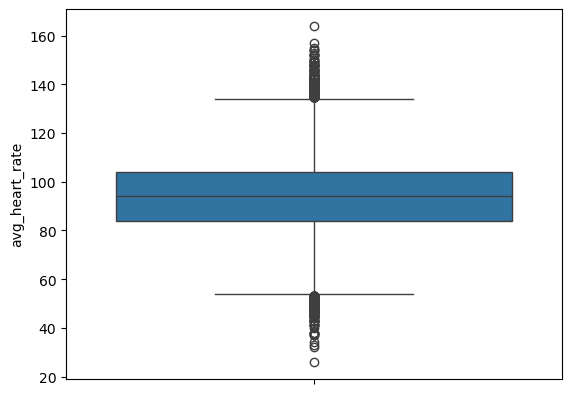

In [134]:
sns.boxplot(df["avg_heart_rate"])
plt.show()

In [135]:
q1 = df["avg_heart_rate"].quantile(0.25)
q1

84.0

In [136]:
q3 =df["avg_heart_rate"].quantile(0.75)
q3

104.0

In [137]:
IQR = q3-q1
IQR

20.0

In [138]:
lower_limit = q1 - 1.5 * IQR

upper_limit = q3 + 1.5 * IQR 

print(ll)
print(ul)

-600.5
15579.5


In [139]:
# we have replace avg heart reate with 100

df.loc[df["avg_heart_rate"]<100, "avg_heart_rate"] = 100

- no need to change upper limit because that can be possible 

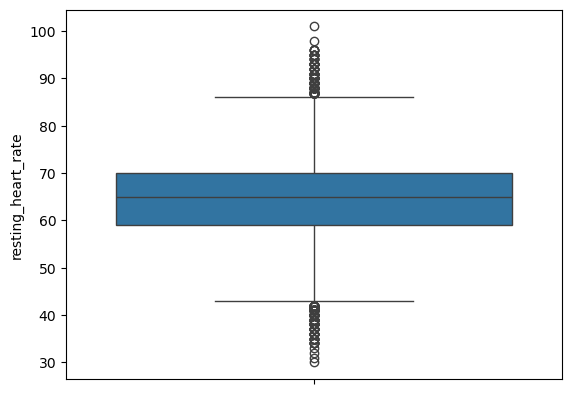

In [140]:
sns.boxplot(df["resting_heart_rate"])
plt.show()

In [141]:
q1 = df["resting_heart_rate"].quantile(0.25)
q1

59.0

In [142]:
q3 = df["resting_heart_rate"].quantile(0.75)
q3

70.0

In [143]:
IQR =q3 -q1
IQR

11.0

In [144]:
lower_limit = q1 - 1.5 * IQR 

upper_limit = q3 + 1.5 * IQR 

print(lower_limit)
print(upper_limit)

42.5
86.5


In [145]:
# replace value which are less then lower limit with lower limt 

df.loc[df["resting_heart_rate"]<lower_limit , "resting_heart_rate"] = lower_limit

# no need to change upper limit because that can be possible

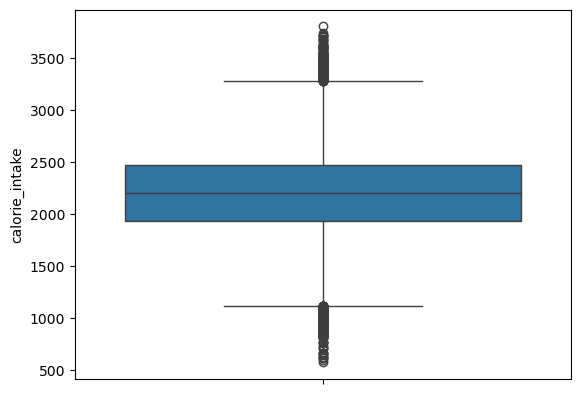

In [146]:
sns.boxplot(df["calorie_intake"])
plt.show()

In [147]:
q1 = df["calorie_intake"].quantile(0.25)
q1

1928.0

In [148]:
q3 = df["calorie_intake"].quantile(0.75)
q3

2469.0

In [149]:
IQR = q3 - q1
IQR

541.0

In [150]:
lower_limit = q1 - 1.5 * IQR 

upper_limit = q3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

1116.5
3280.5


In [151]:
# replace value which are less then lower limit with lower limt 

df.loc[df["calorie_intake"]<lower_limit , "calorie_intake"] = lower_limit

# no need to change upper limit because that can be possible

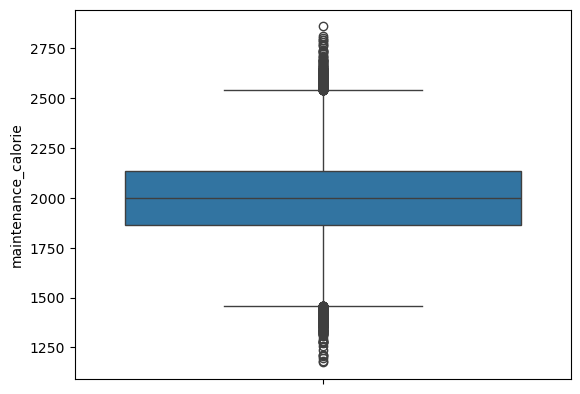

In [152]:
sns.boxplot(df["maintenance_calorie"])
plt.show()

In [153]:
q1 = df["maintenance_calorie"].quantile(0.25)
q1

1864.0

In [154]:
q3 = df["maintenance_calorie"].quantile(0.75)
q3

2134.0

In [155]:
IQR = q3-q1
IQR

270.0

In [156]:
lower_limit = q1 - 1.5 * IQR

upper_limit = q3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

1459.0
2539.0


In [157]:
# replace value which are less then lower limit with lower limt 

df.loc[df["maintenance_calorie"]<lower_limit , "maintenance_calorie"] = lower_limit

# no need to change upper limit because that can be possible

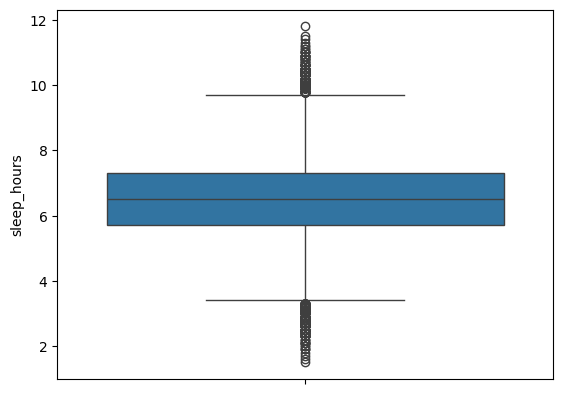

In [158]:
sns.boxplot(df["sleep_hours"])
plt.show()

In [159]:
q1 = df["sleep_hours"].quantile(0.25)
q1

5.7

In [160]:
q3 =  df["sleep_hours"].quantile(0.75)
q3

7.3

In [161]:
IQR = q3-q1
IQR

1.5999999999999996

In [162]:
lower_limit = q1 - 1.5 * IQR

upper_limit = q3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

3.3000000000000007
9.7


In [163]:
# replace value which are less then lower limit with lower limt 

df.loc[df["sleep_hours"]<lower_limit , "sleep_hours"] = lower_limit

# no need to change upper limit because that can be possible

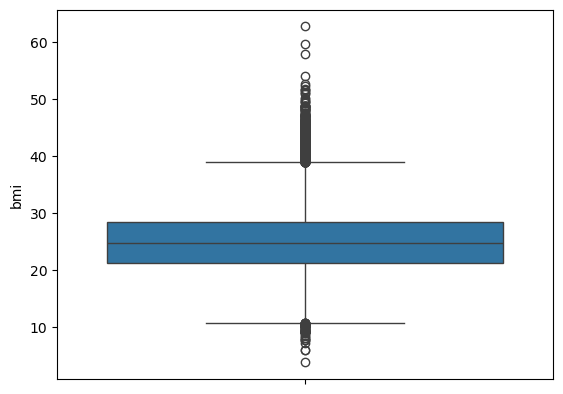

In [164]:
sns.boxplot(df["bmi"])
plt.show()

In [165]:
q1 = df["bmi"].quantile(0.25)
q1

21.3

In [166]:
q3 =  df["bmi"].quantile(0.75)
q3

28.36

In [167]:
IQR = q3-q1
IQR

7.059999999999999

In [168]:
lower_limit = q1 - 1.5 * IQR

upper_limit = q3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

10.710000000000003
38.949999999999996


In [169]:
#we have replace bmi which is lower then 17 with 17 according to researh 

df.loc[df["bmi"]<17, "bmi"] = 17

# noneed to change upperlimit that can be possible

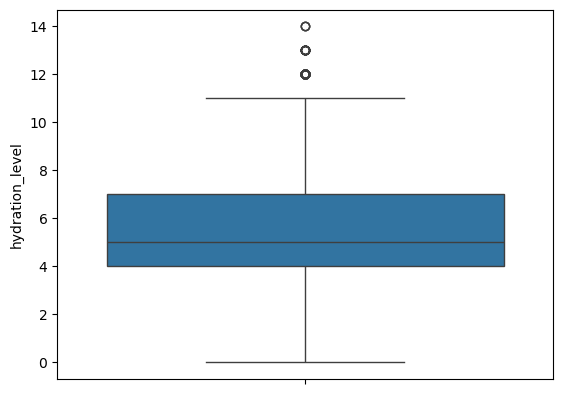

In [170]:
sns.boxplot(df["hydration_level"])
plt.show()

In [171]:
q1 = df["hydration_level"].quantile(0.25)
q1

4.0

In [172]:
q3 =  df["hydration_level"].quantile(0.75)
q3

7.0

In [173]:
IQR = q3-q1
IQR

3.0

In [174]:
lower_limit = q1 - 1.5 * IQR

upper_limit = q3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

-0.5
11.5


In [175]:
#replacing values which are less then 1 with 1 according to research

df.loc[df["hydration_level"]<1 , "hydration_level"] = 1

In [176]:
#replacing values which are higher then 5 with 5 according to research

df.loc[df["hydration_level"]>5 , "hydration_level"] = 5

## Treating missing values 

In [177]:
df.isnull().sum()/len(df)*100

participant_id          0.000000
date                    0.000000
age                     9.859767
gender                  4.958193
height_cm               9.720242
weight_kg               9.751585
activity_type           0.000000
duration_minutes        4.744861
intensity               0.000000
calories_burned         9.732375
daily_steps             9.734397
avg_heart_rate          9.780905
resting_heart_rate      9.755629
calorie_intake          9.746530
maintenance_calorie     9.767762
goal                    0.000000
endurance_level         0.000000
sleep_hours             9.756640
stress_level            0.000000
hydration_level         4.747894
smoking_status          0.000000
health_condition       69.914162
fitness_level           0.000000
bmi                     9.740463
category                0.000000
dtype: float64

In [178]:
df[continous].skew()

height_cm             -0.013688
weight_kg              0.021828
duration_minutes       4.150483
calories_burned        0.045832
daily_steps            0.066676
avg_heart_rate         2.331375
resting_heart_rate     0.021764
calorie_intake         0.027251
maintenance_calorie    0.023439
sleep_hours            0.025266
bmi                    0.599724
dtype: float64

In [179]:
df[count].skew()

age                0.152608
hydration_level   -1.451880
dtype: float64

In [180]:
df["age"] = df["age"].fillna(df["age"].mean())

df["gender"] = df["gender"].fillna(df["gender"].mode()[0])

df["height_cm"] = df["height_cm"].fillna(df["height_cm"].mean())

df["weight_kg"] = df["weight_kg"].fillna(df["weight_kg"].mean())

df["duration_minutes"] = df["duration_minutes"].fillna(df["duration_minutes"].median())

df["calories_burned"] = df["calories_burned"].fillna(df["calories_burned"].mean())

df["daily_steps"] = df["daily_steps"].fillna(df["daily_steps"].mean())

df["avg_heart_rate"] = df["avg_heart_rate"].fillna(df["avg_heart_rate"].median())

df["resting_heart_rate"] = df["resting_heart_rate"].fillna(df["resting_heart_rate"].mean())

df["calorie_intake"] = df["calorie_intake"].fillna(df["calorie_intake"].mean())

df["maintenance_calorie"] = df["maintenance_calorie"].fillna(df["maintenance_calorie"].mean())

# health condition columns has None so that means healthy but in pandas it cosidering it as null so we are correcting
df["health_condition"] = df["health_condition"].fillna("healthy")

df["sleep_hours"] = df["sleep_hours"].fillna(df["sleep_hours"].mean())

df["hydration_level"] = df["hydration_level"].fillna(df["hydration_level"].median())

df["bmi"] = df["bmi"].fillna(df["bmi"].mean())


### rounding of the values which are in float for proper analysis

In [181]:
df["age"] = df["age"].round()

df["height_cm"] = df["height_cm"].round()

df["weight_kg"] = df["weight_kg"].round()

df["duration_minutes"] = df["duration_minutes"].round()

df["calories_burned"] = df["calories_burned"].round()

df["daily_steps"] =  df["daily_steps"].round()

df["avg_heart_rate"] = df["avg_heart_rate"].round()

df["resting_heart_rate"] = df["resting_heart_rate"].round()

df["calorie_intake"] = df["calorie_intake"].round()

df["maintenance_calorie"] = df["maintenance_calorie"].round()

df["sleep_hours"] = df["sleep_hours"].round()

df["hydration_level"] = df["hydration_level"].round()

df["bmi"] = df["bmi"].round()

### dropping column

In [182]:
df.drop(columns=['participant_id'], axis = 1,inplace = True)

- No need of 'participant_id'column in futher analysis

In [183]:
df.dtypes

date                   datetime64[ns]
age                           float64
gender                         object
height_cm                     float64
weight_kg                     float64
activity_type                  object
duration_minutes              float64
intensity                      object
calories_burned               float64
daily_steps                   float64
avg_heart_rate                float64
resting_heart_rate            float64
calorie_intake                float64
maintenance_calorie           float64
goal                           object
endurance_level                object
sleep_hours                   float64
stress_level                   object
hydration_level               float64
smoking_status                 object
health_condition               object
fitness_level                  object
bmi                           float64
category                       object
dtype: object

# ANALYSIS

### UNIVARIATE ANALYSIS

In [184]:
df.columns.tolist()

['date',
 'age',
 'gender',
 'height_cm',
 'weight_kg',
 'activity_type',
 'duration_minutes',
 'intensity',
 'calories_burned',
 'daily_steps',
 'avg_heart_rate',
 'resting_heart_rate',
 'calorie_intake',
 'maintenance_calorie',
 'goal',
 'endurance_level',
 'sleep_hours',
 'stress_level',
 'hydration_level',
 'smoking_status',
 'health_condition',
 'fitness_level',
 'bmi',
 'category']

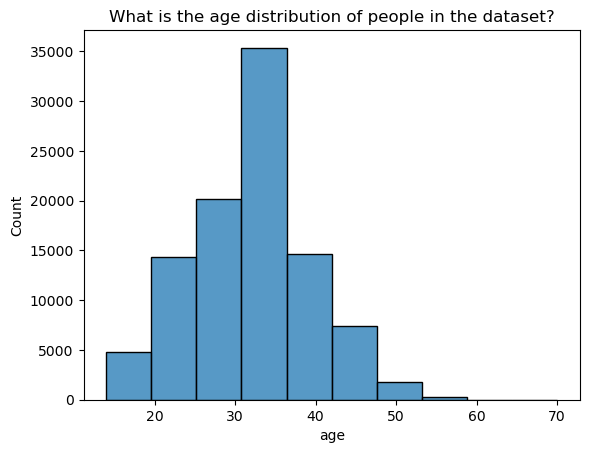

In [185]:
sns.histplot(df["age"] , bins=10)
plt.title("What is the age distribution of people in the dataset?")
plt.savefig("my_graph.png")     
plt.show()

*Observation*

- The age distribution is mostly in between 25–40 years, with the highest count around the early 30s.

In [186]:
df["gender"].value_counts()

gender
Male      64401
Female    34506
Name: count, dtype: int64

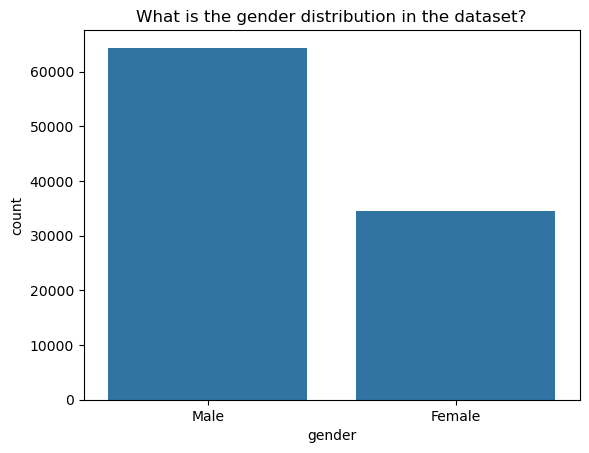

In [187]:
sns.countplot(x=df["gender"])
plt.title("What is the gender distribution in the dataset?")    
plt.savefig("my_graph1.png")     
plt.show()

*Observation*

- There are more males than females in the dataset, with the male count almost double the female count.

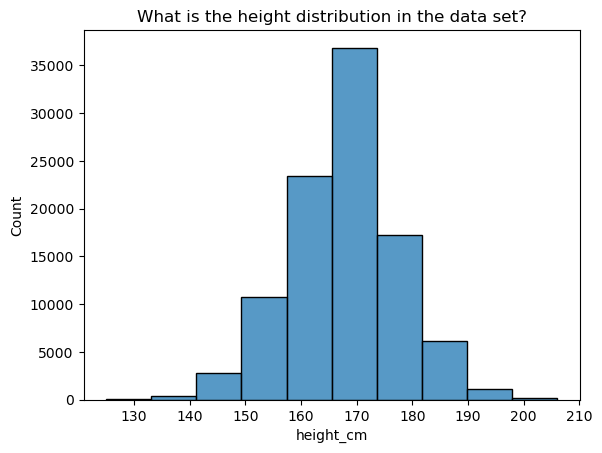

In [188]:
sns.histplot(df["height_cm"], bins =10)
plt.title("What is the height distribution in the data set?")
plt.show()

*Observation*

- Most people in the dataset have a height between 160–180 cm, with the peak around 170 cm.

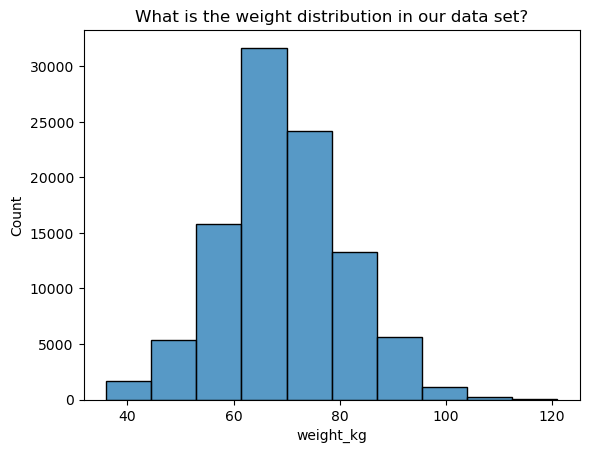

In [189]:
sns.histplot(df["weight_kg"] , bins= 10)
plt.title("What is the weight distribution in our data set?")
plt.savefig("my_graph2.png")     
plt.show()

*Observation*

- Most people in the dataset have a weight between 60-80kg

In [190]:
df["activity_type"].value_counts()

activity_type
Strength    24789
Running     19805
HIIT        19677
Yoga        14666
Dance        9985
Cycling      9985
Name: count, dtype: int64

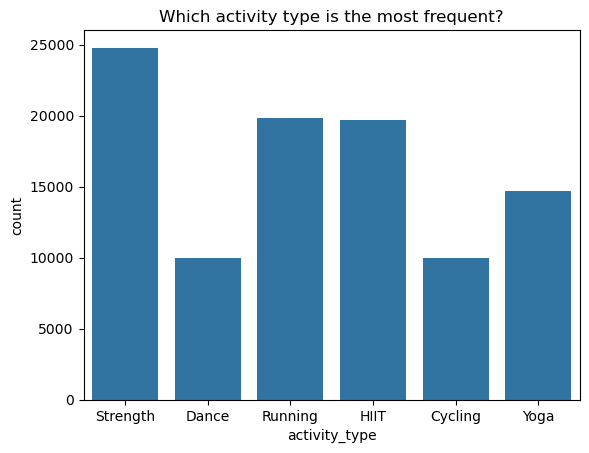

In [191]:
sns.countplot(x =df["activity_type"])
plt.title("Which activity type is the most frequent?")
plt.savefig("my_graph3.png")     
plt.show()

*Observation*

- Strength workouts are the most common activity, while Dance and Cycling are the least performed.

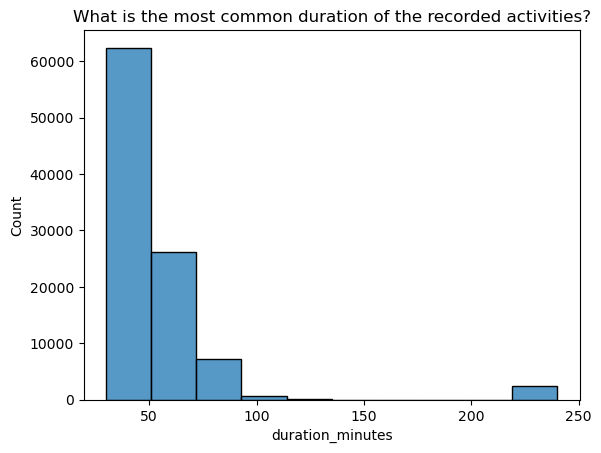

In [192]:
sns.histplot(df["duration_minutes"], bins = 10)
plt.title("What is the most common duration of the recorded activities?")
plt.show()

*Observation*

- Most workouts last between 40–60 minutes, with very few sessions extending beyond 100 minutes.

In [193]:
df["intensity"].value_counts()

intensity
Medium    49462
High      29776
Low       19669
Name: count, dtype: int64

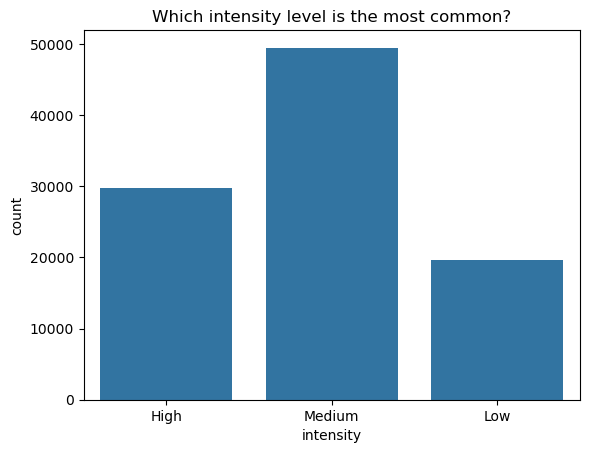

In [194]:
sns.countplot(x = df["intensity"])
plt.title("Which intensity level is the most common?")
plt.savefig("my_graph4.png")     
plt.show()

*Observation*

- Almost 50%  of people doing workout with Medium intensity

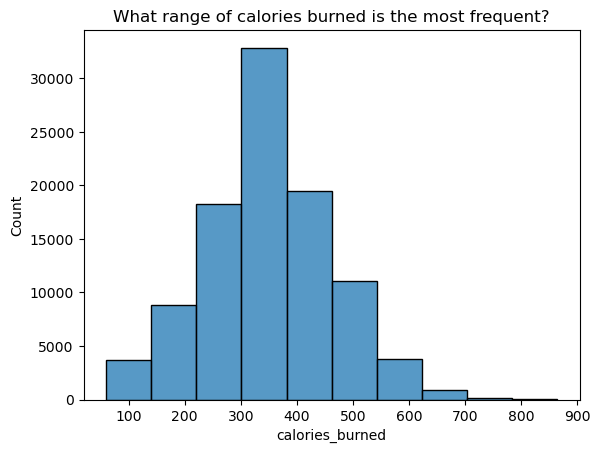

In [195]:
sns.histplot(df["calories_burned"] , bins =10)
plt.title("What range of calories burned is the most frequent?")
plt.savefig("my_graph5.png")     
plt.show()

*Observation*

- Most people in the data set are burning calories in between 200-500 

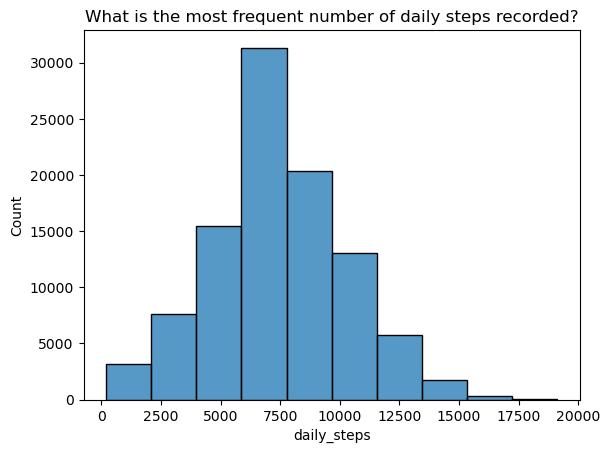

In [196]:
sns.histplot(df["daily_steps"], bins = 10)
plt.title("What is the most frequent number of daily steps recorded?")
plt.savefig("my_graph6.png")     
plt.show()

*Observation*

- The data shows that the most frequent number of daily steps is between 5,000 and 10,000 , With the peak around 7,500

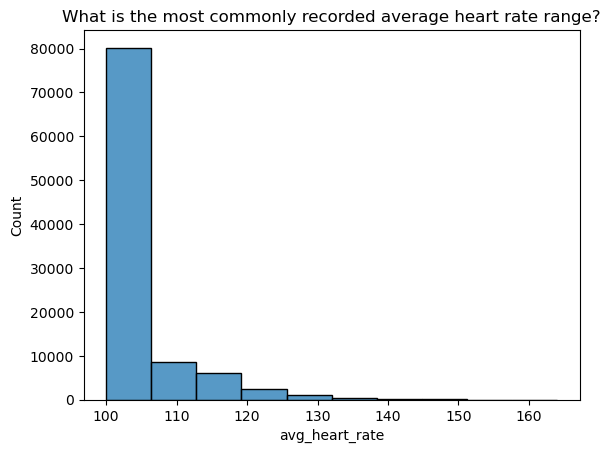

In [197]:
sns.histplot(df["avg_heart_rate"], bins = 10)
plt.title("What is the most commonly recorded average heart rate range?")
plt.show()

*Observation*

- Almost 80% of the people's avg_heart_rate is in between 100-110 Bpm in our data 

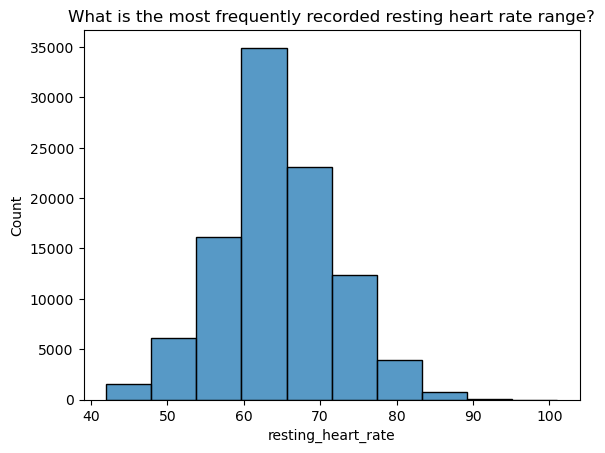

In [198]:
sns.histplot(df["resting_heart_rate"], bins = 10)
plt.title("What is the most frequently recorded resting heart rate range?")
plt.show()

*Observation*

- Most people in our data set is having resting heart rate in between 60-70 Bpm

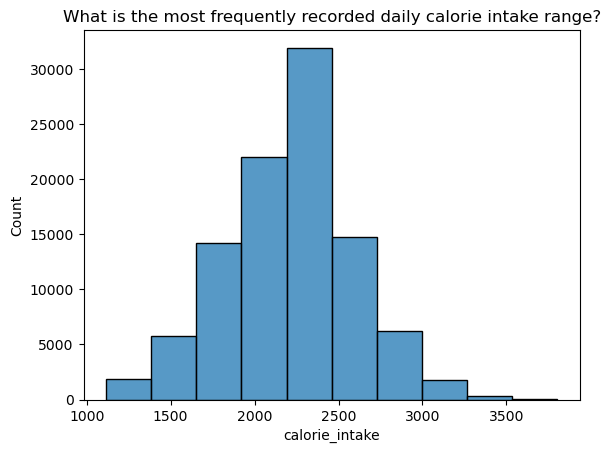

In [199]:
sns.histplot(df["calorie_intake"], bins = 10)
plt.title("What is the most frequently recorded daily calorie intake range?")
plt.savefig("my_graph7.png")     
plt.show()

*Observation*

- The data set shows that the most people calorie intake is between 2,000 - 2,500.kcal

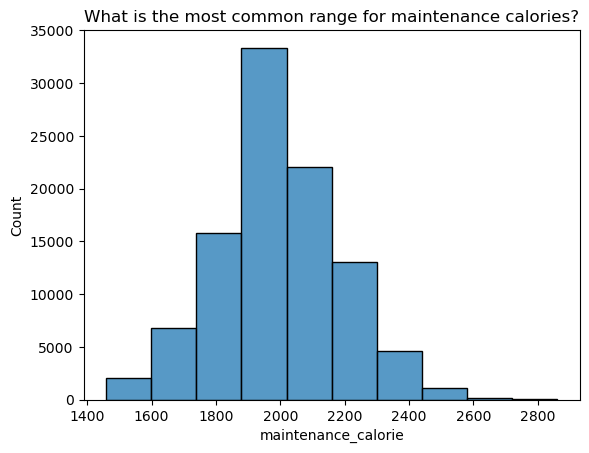

In [200]:
sns.histplot(df["maintenance_calorie"], bins = 10)
plt.title("What is the most common range for maintenance calories?")
plt.show()

*Observation*

- The data set shows that the most people maintenance calorie is between 1,800 - 2,200.kcal

In [201]:
df["goal"].value_counts()

goal
Weight Loss    39447
Muscle Gain    29857
Maintenance    29603
Name: count, dtype: int64

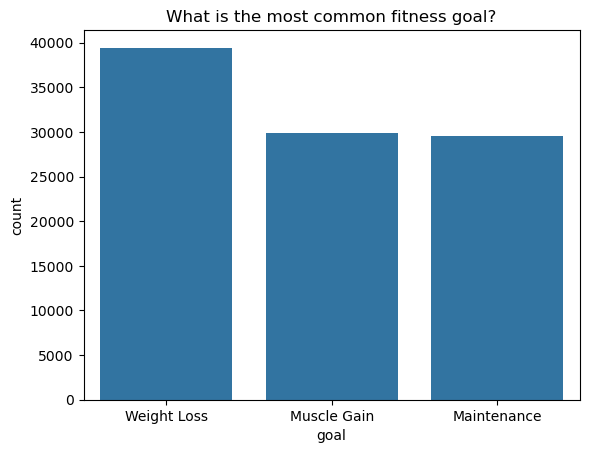

In [202]:
sns.countplot(x=df["goal"])
plt.title("What is the most common fitness goal?")
plt.show()

*Observation*

- Most of the people's goal is to do Weight Loss as compare to muscla gain and maintenance

In [203]:
df["endurance_level"].value_counts()

endurance_level
Medium    49336
Low       29648
High      19923
Name: count, dtype: int64

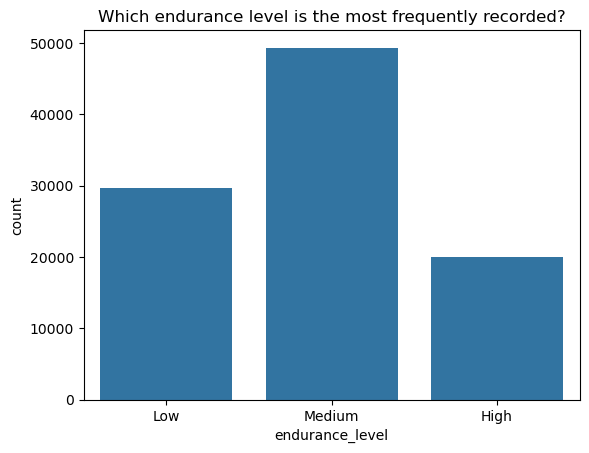

In [204]:
sns.countplot(x = df["endurance_level"])
plt.title("Which endurance level is the most frequently recorded?")
plt.savefig("my_graph8.png")     
plt.show()

*Observation*

- Almost 50% people in our data set is having  Medium Endurece level 

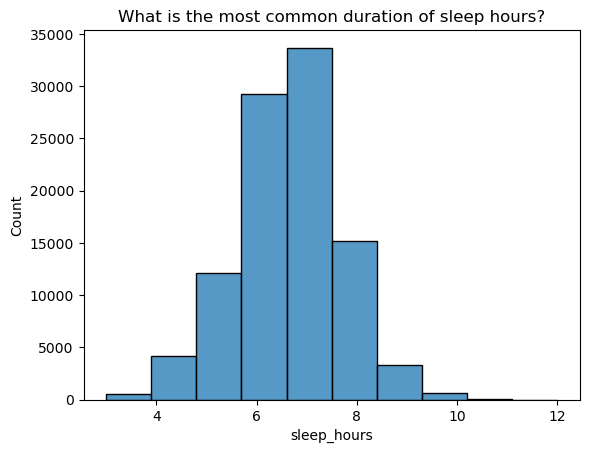

In [205]:
sns.histplot(df["sleep_hours"], bins = 10)
plt.title("What is the most common duration of sleep hours?")
plt.savefig("my_graph9.png")     
plt.show()

*Observation*

- The data set shows that most of the people sleep hours is in between 6-8 hrs

In [206]:
df["stress_level"].value_counts()

stress_level
Medium     44841
Low        29592
High       19480
Extreme     4994
Name: count, dtype: int64

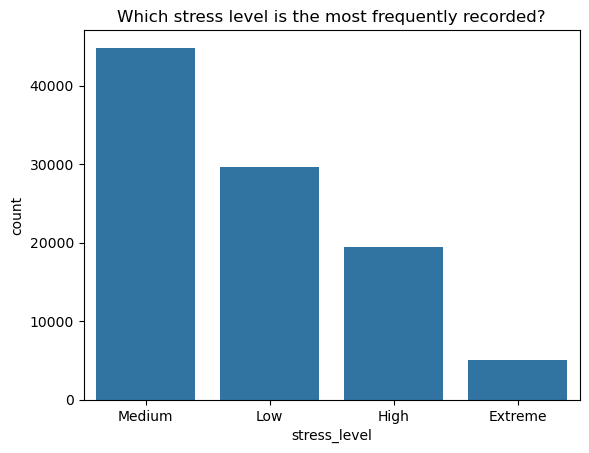

In [207]:
sns.countplot(x=df["stress_level"])
plt.title("Which stress level is the most frequently recorded?")
plt.savefig("my_graph10.png")     
plt.show()

*Observation*

- The data set shows that almost 45% of the people haning medium stress level and 5% of the people having extreme stree level

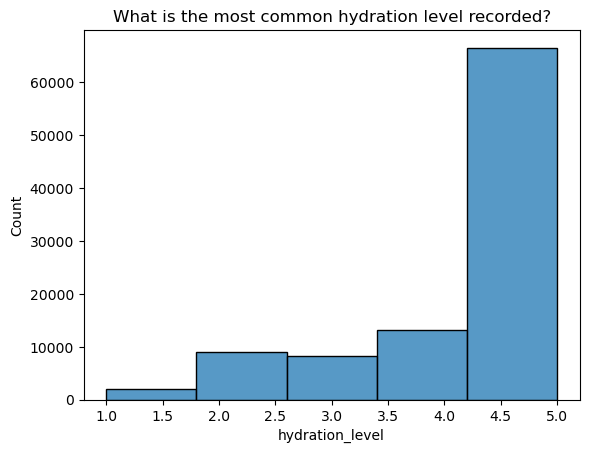

In [208]:
sns.histplot(df["hydration_level"], bins = 5)
plt.title("What is the most common hydration level recorded?")
plt.savefig("my_graph11.png")     
plt.show()

*Observation*

- More then 60% of the people in our data set is drinking 4-5 litres of water per day

In [209]:
df["smoking_status"].value_counts()

smoking_status
Non-smoker    79046
Occasional     9971
Smoker         9890
Name: count, dtype: int64

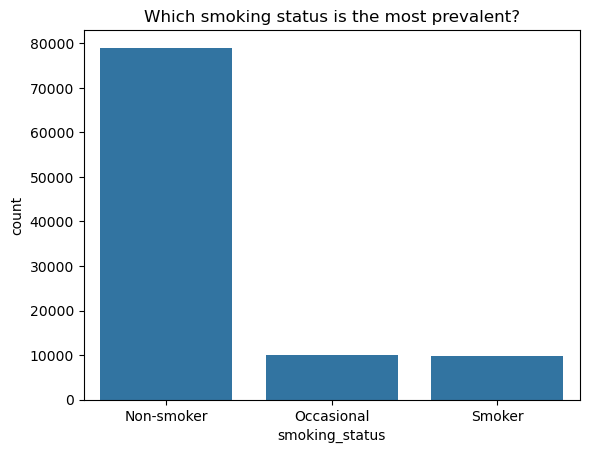

In [210]:
sns.countplot(x=df["smoking_status"])
plt.title("Which smoking status is the most prevalent?")
plt.show()

*Observation*

- The majority of people in the dataset are Non-smokers

In [211]:
df["health_condition"].value_counts()

health_condition
healthy         69150
Asthma          12083
Hypertension     9828
Diabetes         7846
Name: count, dtype: int64

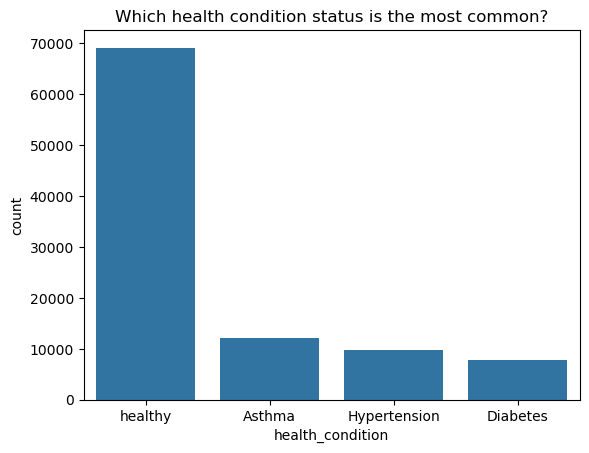

In [212]:
sns.countplot(x =df["health_condition"])
plt.title("Which health condition status is the most common?")
plt.show()

*Observation*

- Healthy people are more in our data as compare to asthma , hypertension and diabetes

In [213]:
df["fitness_level"].value_counts()

fitness_level
Beginner        49403
Intermediate    34728
Advanced        14776
Name: count, dtype: int64

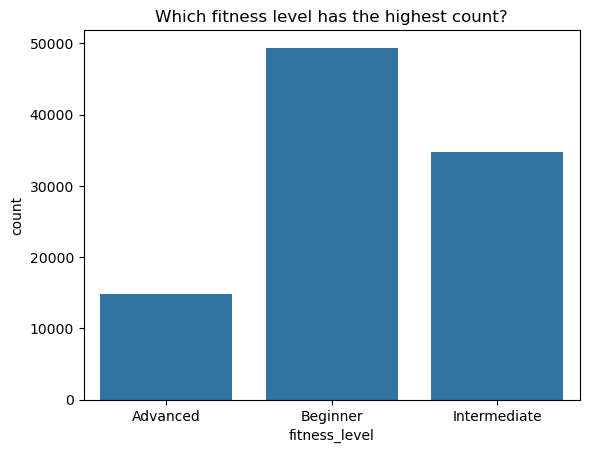

In [214]:
sns.countplot(x =df["fitness_level"])
plt.title("Which fitness level has the highest count?")
plt.savefig("my_graph12.png")     
plt.show()

*Observation*

- The majority of people in the dataset are beginners 

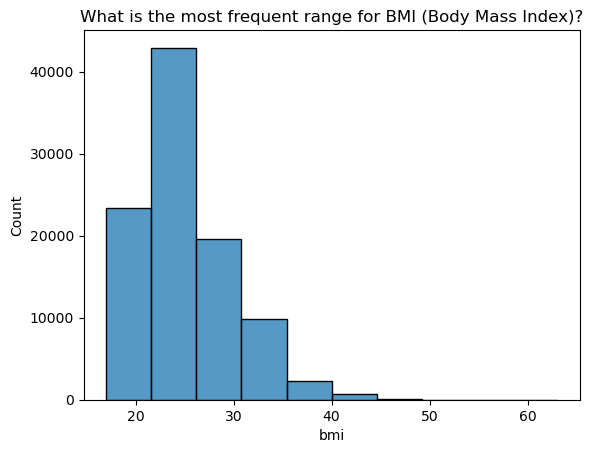

In [215]:
sns.histplot(df["bmi"] , bins = 10)
plt.title("What is the most frequent range for BMI (Body Mass Index)?")
plt.savefig("my_graph13.png")     
plt.show()

*Observation*

- The data set  shows that the most common Body Mass Index (BMI) is between 25 and 30.

In [216]:
df["category"].value_counts()

category
Normal         41972
Overweight     30047
Obese          17052
Underweight     9836
Name: count, dtype: int64

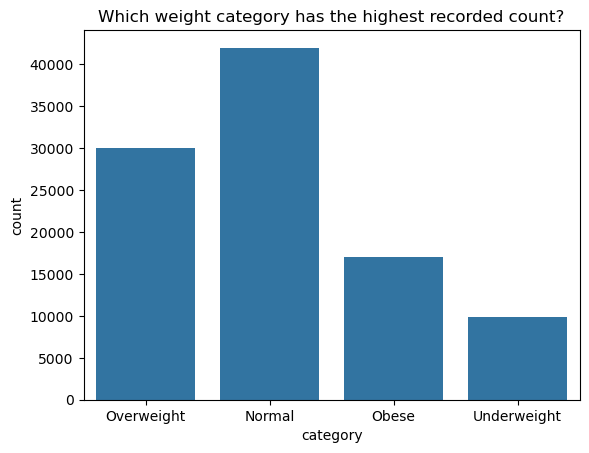

In [217]:
sns.countplot(x =df["category"])
plt.title("Which weight category has the highest recorded count?")
plt.savefig("my_graph14.png")     
plt.show()

*Observation*

- Most of the poeple are comes under normal category but there are some people in over weight 

## Bivariate Analysis

In [218]:
calorie_burned_by_goal = df.groupby("goal")["calories_burned"].mean()

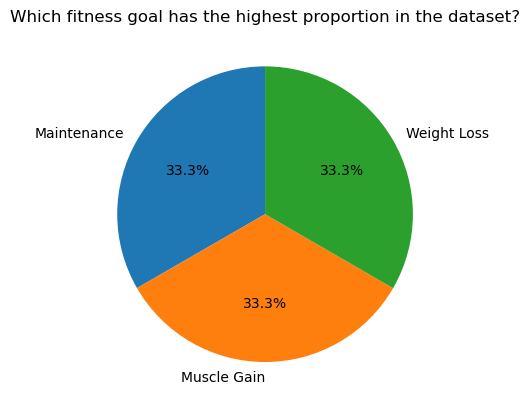

In [219]:
plt.pie(calorie_burned_by_goal, labels=calorie_burned_by_goal.index, autopct='%1.1f%%', startangle=90)
plt.title("Which fitness goal has the highest proportion in the dataset?")
plt.savefig("my_graph15.png")     
plt.show()

*Observation*
- The average calories burned is almost the same for all three goals.
- This means the goal itself doesn’t affect calories burned — workout type or intensity matters more.

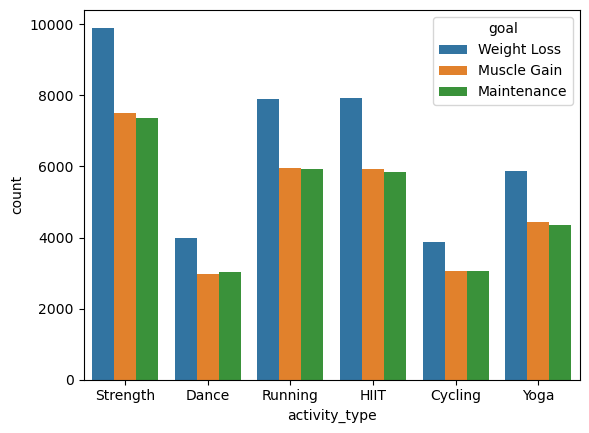

<Figure size 640x480 with 0 Axes>

In [220]:
sns.countplot(x=df["activity_type"] ,hue= df["goal"])
plt.show("Which activity is most popular for our goal?")
plt.savefig("my_graph16.png")     
plt.show()

*Observation*
- Weight-loss users prefer every activity more than muscle-gain and maintenance users.
- Strength, Running, and HIIT are the most chosen activities across all goals.

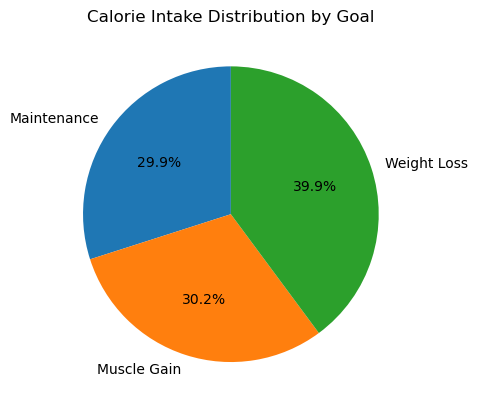

In [221]:

calories_by_goal = df.groupby('goal')['calorie_intake'].sum()

plt.pie(calories_by_goal, labels=calories_by_goal.index, autopct='%1.1f%%', startangle=90)
plt.title('Calorie Intake Distribution by Goal')
plt.savefig("my_graph17.png")     
plt.show()


*Observation* 
- Average calorie intake is little heigh for  weight loss as compare to  muscle gain and maintenance groups.

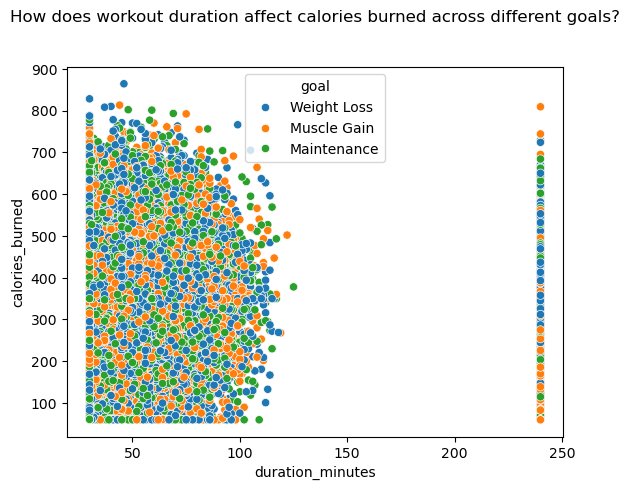

In [222]:
sns.scatterplot(x=df["duration_minutes"] , y=df["calories_burned"], hue=df["goal"])
plt.title("How does workout duration affect calories burned across different goals?", y=1.10)
plt.savefig("my_graph18.png")     
plt.show()

*Observation*
- Longer workout duration generally leads to higher calories burned for all three goals.
- The pattern is similar across goals, meaning duration impacts calorie burn more than the goal itself.

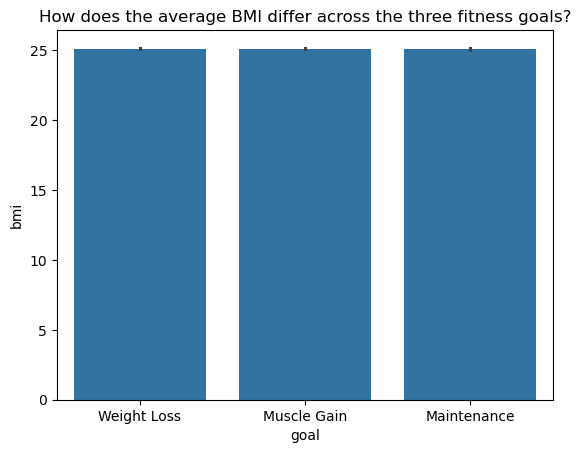

In [223]:
sns.barplot(y =df["bmi"] , x = df["goal"])
plt.title("How does the average BMI differ across the three fitness goals?")
plt.show()

*Observation*

- The BMI is almost the same for all three goals: Weight Loss, Muscle Gain, and Maintenance.
- There is no noticeable difference in BMI between the different fitness goals.

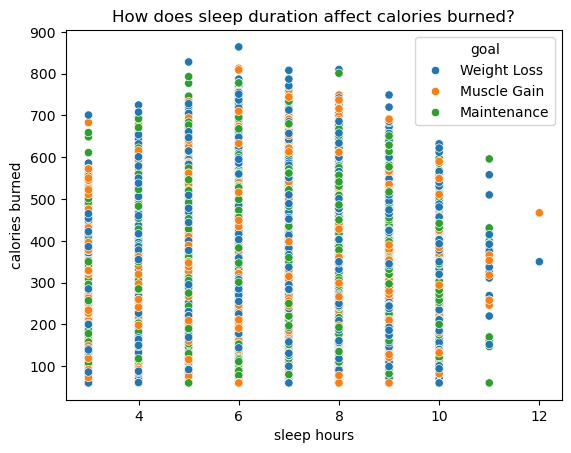

In [224]:
sns.scatterplot(x="sleep_hours", y="calories_burned", hue="goal", data=df) 
plt.xlabel("sleep hours")
plt.ylabel("calories burned")
plt.title("How does sleep duration affect calories burned?")
plt.savefig("my_graph19.png")     
plt.show()

*Observation*

- People who sleep between 6–8 hours tend to burn more calories than others.
- All three goals (weight loss, muscle gain, maintenance) show a similar pattern in calorie burn.

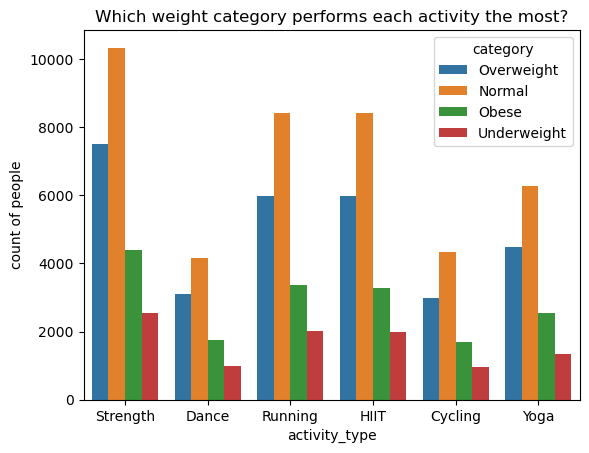

In [225]:
sns.countplot(x = df["activity_type"] , hue =df["category"])
plt.title("Which weight category performs each activity the most?")
plt.xlabel("activity_type")
plt.ylabel("count of people")
plt.savefig("my_graph20.png")     
plt.show()

 *Observation*

- People with normal weight participate in all activities the most.
- Underweight people join activities the least across all categories.

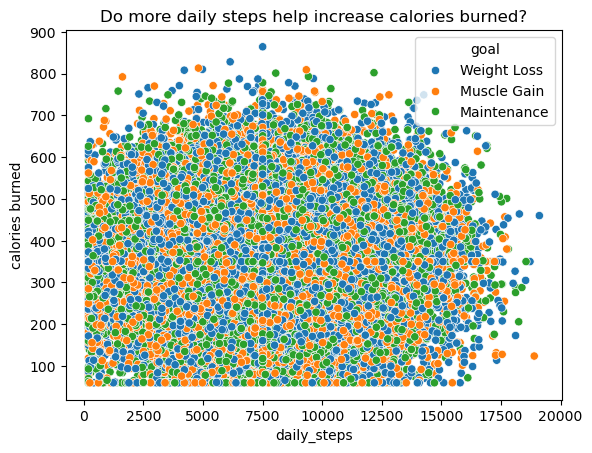

In [226]:
sns.scatterplot(x="daily_steps" , y="calories_burned" , hue ="goal" , data=df)
plt.title("Do more daily steps help increase calories burned?")
plt.xlabel("daily_steps")
plt.ylabel("calories burned")
plt.savefig("my_graph21.png")     
plt.show()

*Observation*

- People who take more daily steps usually burn more calories.
- All three goals (weight loss, muscle gain, maintenance) show a similar increasing pattern.

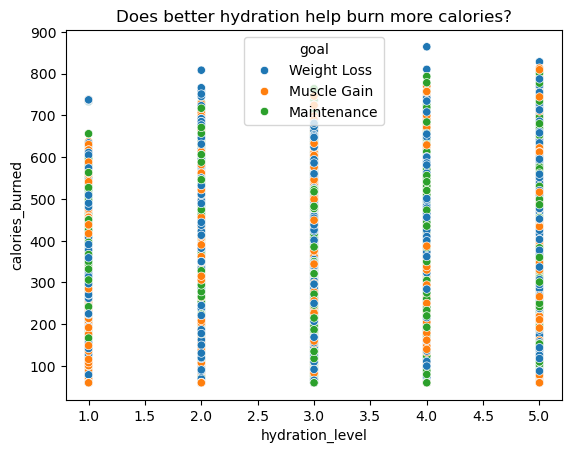

In [227]:
sns.scatterplot(data=df, x="hydration_level", y="calories_burned", hue="goal")
plt.title("Does better hydration help burn more calories?")
plt.savefig("my_graph22.png")     
plt.show()

*Observation*

- Higher hydration levels are linked with slightly higher calories burned.
- All three goals show a similar upward pattern as hydration improves.

In [228]:
df["day_name"]=df["date"].dt.day_name()

In [229]:
(df.groupby(["day_name","activity_type"])["activity_type"].count())

day_name   activity_type
Friday     Cycling          1412
           Dance            1372
           HIIT             2793
           Running          2829
           Strength         3514
           Yoga             2052
Monday     Cycling          1409
           Dance            1423
           HIIT             2842
           Running          2845
           Strength         3488
           Yoga             2125
Saturday   Cycling          1426
           Dance            1484
           HIIT             2774
           Running          2800
           Strength         3550
           Yoga             2085
Sunday     Cycling          1447
           Dance            1467
           HIIT             2878
           Running          2865
           Strength         3655
           Yoga             2173
Thursday   Cycling          1444
           Dance            1418
           HIIT             2801
           Running          2787
           Strength         3564
           Yoga   

In [230]:
s = df.groupby(["day_name", "activity_type"]).size()
df2 = s.reset_index(name="count")

In [231]:
top3 = df2.sort_values(["day_name", "count"], ascending=[True, False]) \
          .groupby("day_name") \
          .head(3)


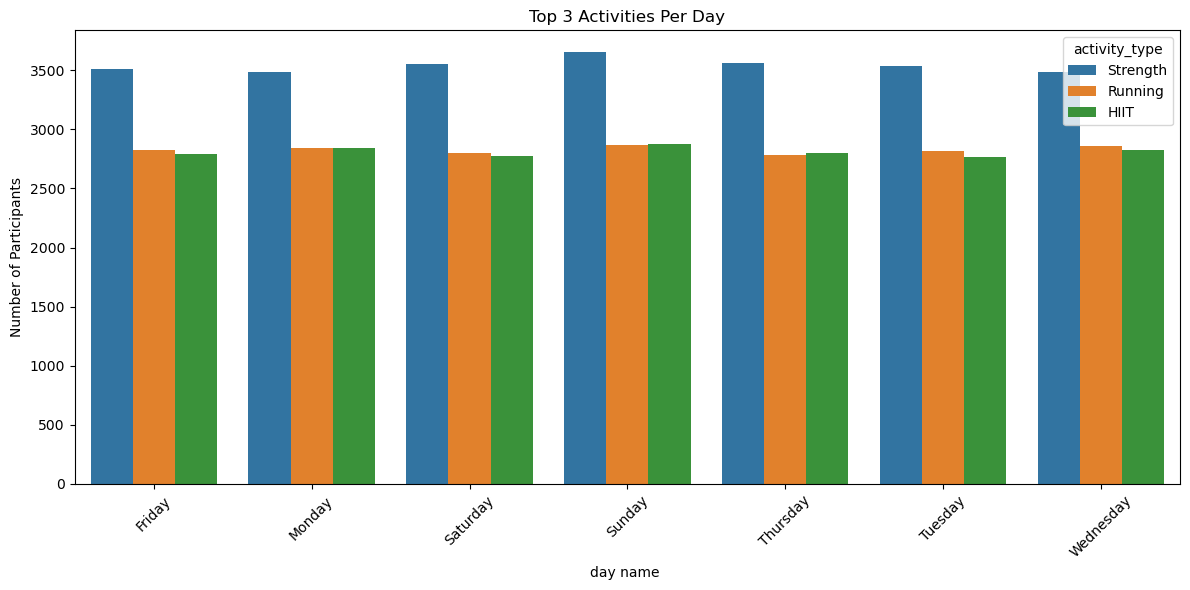

In [232]:
plt.figure(figsize=(12,6))
sns.barplot(data=top3, x="day_name", y="count", hue="activity_type")
plt.title("Top 3 Activities Per Day")
plt.xlabel("day name ")
plt.ylabel("Number of Participants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Observation* 

- Strength training is the most popular activity on every day of the week.
- Running and HIIT have similar participation, with slight ups and downs across days.

# Multivariate Analysis

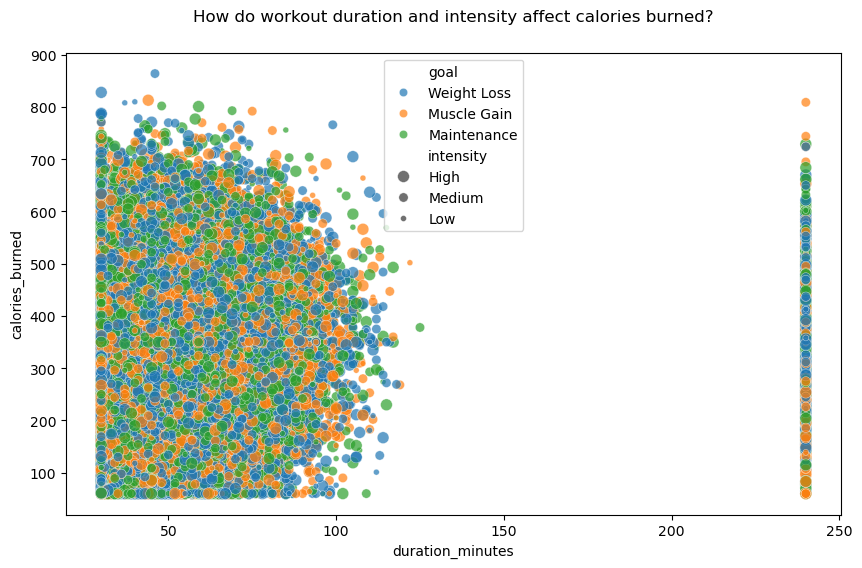

In [233]:
plt.figure(figsize=(10,6))
sns.scatterplot( data=df, x="duration_minutes", y="calories_burned", size="intensity", hue="goal", alpha=0.7)
plt.title("How do workout duration and intensity affect calories burned?", y = 1.05) 
plt.savefig("my_graph23.png")     
plt.show()

*Observation*

- Longer workouts generally lead to more calories burned, especially at higher intensity.
- All fitness goals follow the same upward trend with duration and intensity.

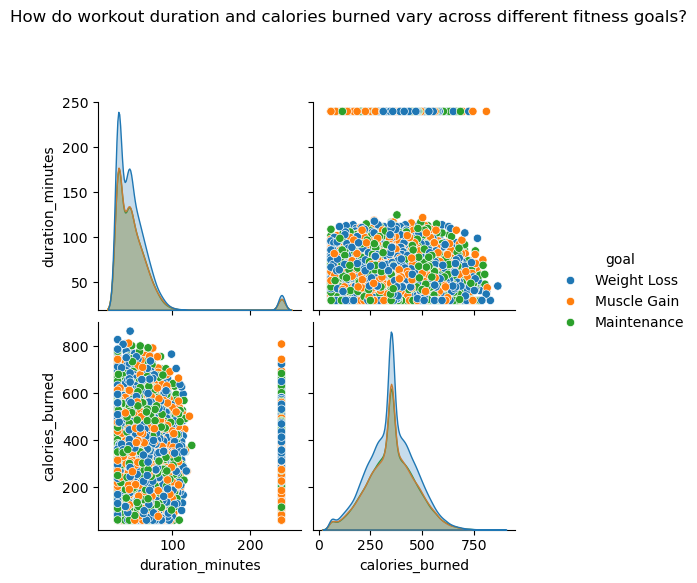

In [234]:
g=sns.pairplot(df[["duration_minutes", "intensity", "calories_burned", "goal"]],
             hue="goal")
g.fig.suptitle("How do workout duration and calories burned vary across different fitness goals?",
                y=1.15)   # moves titleplt.show()
plt.savefig("my_graph24.png")     

plt.show()

*Observation*

- Most workouts are short (under 100 minutes), and calories burned are mostly between 200–600.
- All three goals show very similar patterns in both duration and calories.

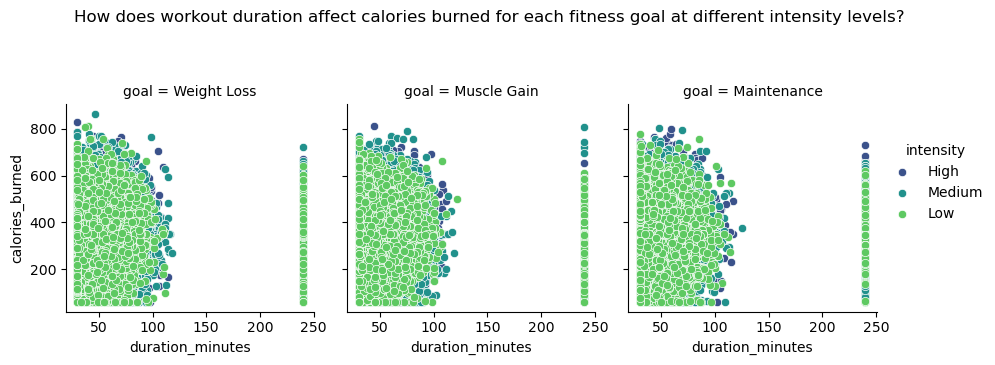

In [235]:
g = sns.FacetGrid(df, col="goal", hue="intensity", palette="viridis")
g.map_dataframe(sns.scatterplot, x="duration_minutes", y="calories_burned")
g.add_legend()
g.fig.suptitle("How does workout duration affect calories burned for each fitness goal at different intensity levels?", y=1.20)
plt.savefig("my_graph25.png")     

plt.show()

*Observation*

- Longer workouts generally burn more calories across all three goals.
- Higher intensity points appear slightly higher, meaning intensity also increases calories burned.

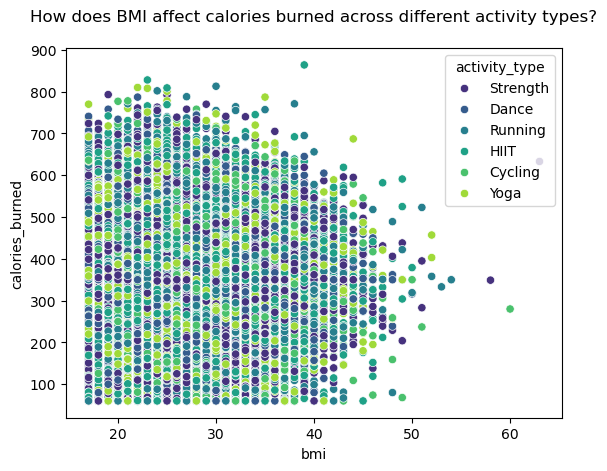

In [236]:
sns.scatterplot(data=df,x="bmi",y="calories_burned", hue="activity_type",palette = "viridis")
plt.title("How does BMI affect calories burned across different activity types?", y = 1.05)
plt.savefig("my_graph26.png")     

plt.show()


*Observation*

-  People with lower BMI generally burn more calories than those with higher BMI.
-  All activities follow a similar pattern, with calorie burn decreasing as BMI increases.

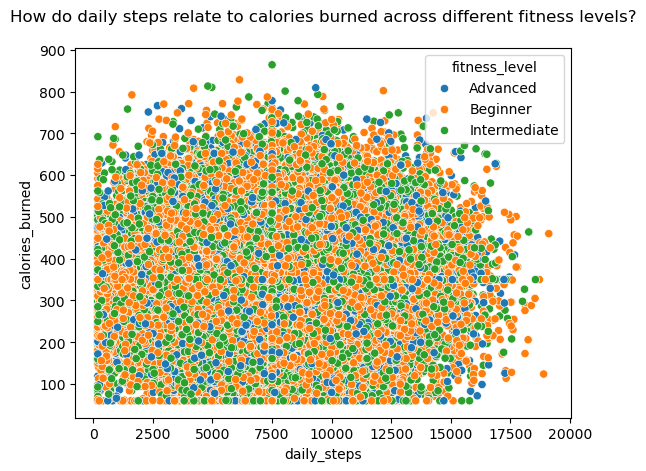

In [237]:
sns.scatterplot(data=df,
                x="daily_steps",
                y="calories_burned",
                hue="fitness_level")
plt.title("How do daily steps relate to calories burned across different fitness levels?", y =1.05)
plt.savefig("my_graph27.png")     

plt.show()


*Observation*

- Calories burned slightly increase as daily steps go up.
- All fitness levels show a similar spread, with no big difference between beginner, intermediate, and advanced.